In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df=pd.read_csv('webdev9.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [26]:
df.head()


,Date,Layoffs
0,2014-04,196
1,2014-05,392
2,2014-06,265
3,2014-07,194
4,2014-08,205


In [27]:
df.columns=["Date","Layoffs"]
df.head()

,Date,Layoffs
0,2014-04,196
1,2014-05,392
2,2014-06,265
3,2014-07,194
4,2014-08,205


In [28]:
df['Date']=pd.to_datetime(df['Date'])


In [29]:
df.set_index('Date',inplace=True)

In [8]:
df.describe()

,Layoffs
count,105.000000
mean,317.266667
std,189.586710
min,85.000000
25%,187.000000
50%,265.000000
75%,433.000000
max,1082.000000


<Axes: xlabel='Date'>

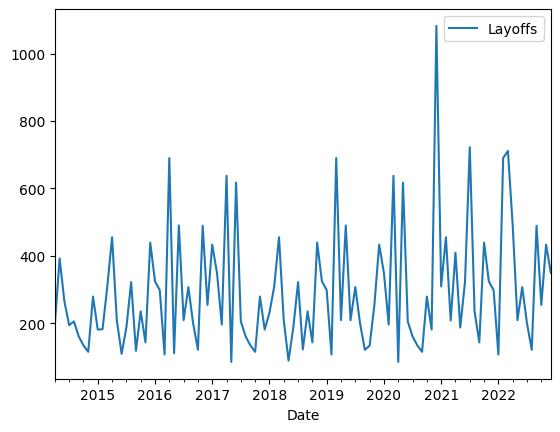

In [30]:
df.plot()

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
test_result=adfuller(df['Layoffs'])

In [33]:
def adfuller_test(Layoffs):
    result=adfuller(Layoffs)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [34]:

adfuller_test(df['Layoffs'])

ADF Test Statistic : -6.304590451280592
p-value : 3.347591167485785e-08
#Lags Used : 1
Number of Observations Used : 103
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [35]:
df['Sales First Difference'] = df['Layoffs'] - df['Layoffs'].shift(1)
df['Layoffs'].shift(1)

Date
2014-04-01      NaN
2014-05-01    196.0
2014-06-01    392.0
2014-07-01    265.0
2014-08-01    194.0
              ...  
2022-08-01    199.0
2022-09-01    121.0
2022-10-01    489.0
2022-11-01    254.0
2022-12-01    433.0
Name: Layoffs, Length: 105, dtype: float64

In [36]:
df['Seasonal First Difference']=df['Layoffs']-df['Layoffs'].shift(12)
df.head(14)

,Layoffs,Sales First Difference,Seasonal First Difference
Date,,,
2014-04-01,196,NaN,NaN
2014-05-01,392,196.0,NaN
2014-06-01,265,-127.0,NaN
2014-07-01,194,-71.0,NaN
2014-08-01,205,11.0,NaN
2014-09-01,161,-44.0,NaN
2014-10-01,134,-27.0,NaN
2014-11-01,115,-19.0,NaN
2014-12-01,279,164.0,NaN


In [37]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.210241116248772
p-value : 0.019399483748611463
#Lags Used : 12
Number of Observations Used : 80
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

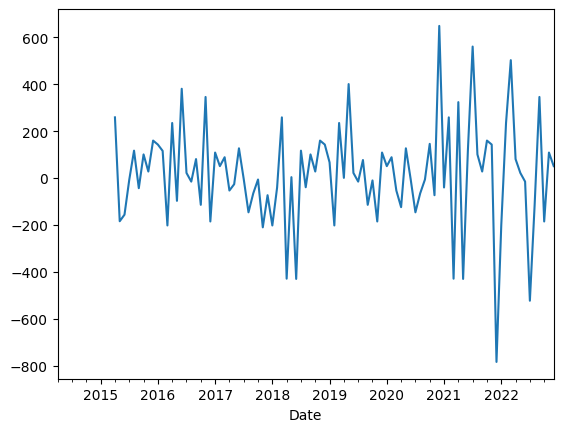

In [38]:
df['Seasonal First Difference'].plot()


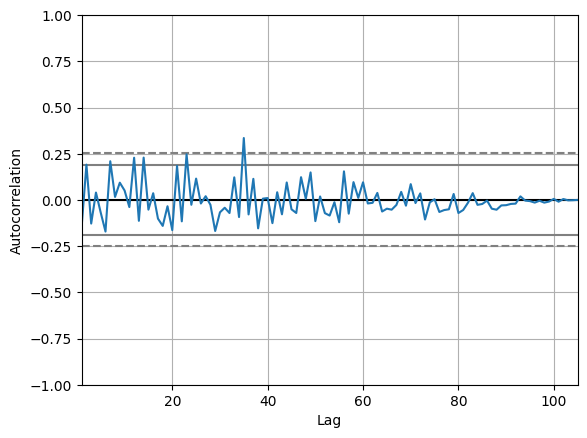

In [39]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Layoffs'])
plt.show()

c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


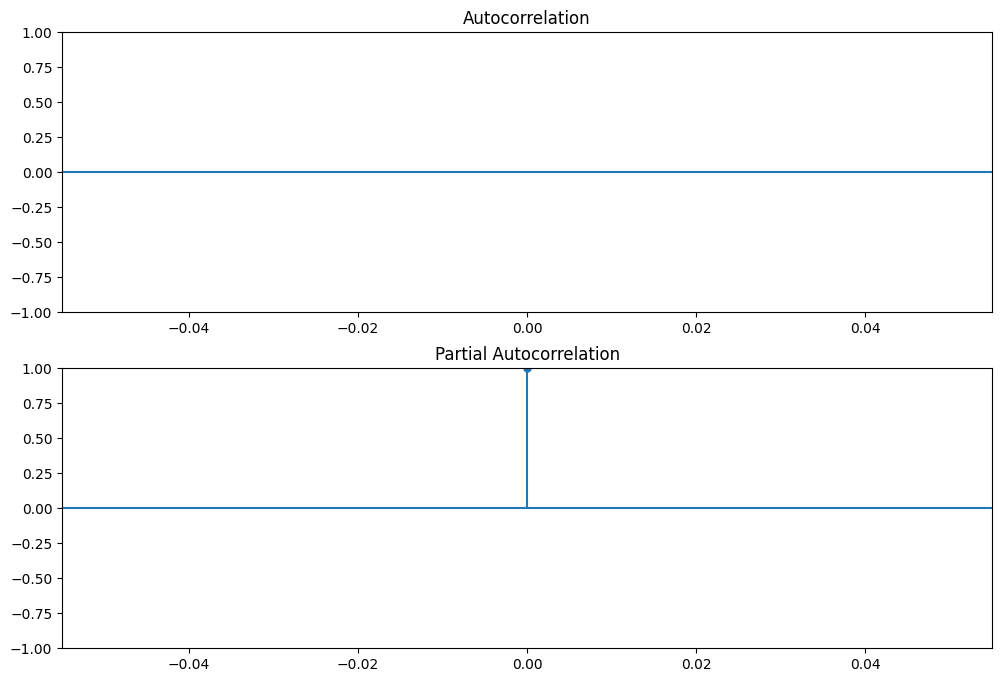

In [40]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[1:],lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[1:],lags=15,ax=ax2)

In [41]:
model=sm.tsa.statespace.SARIMAX(df['Layoffs'],order=(1, 1, 1),seasonal_order=(1,1,1,13))
results=model.fit()

c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

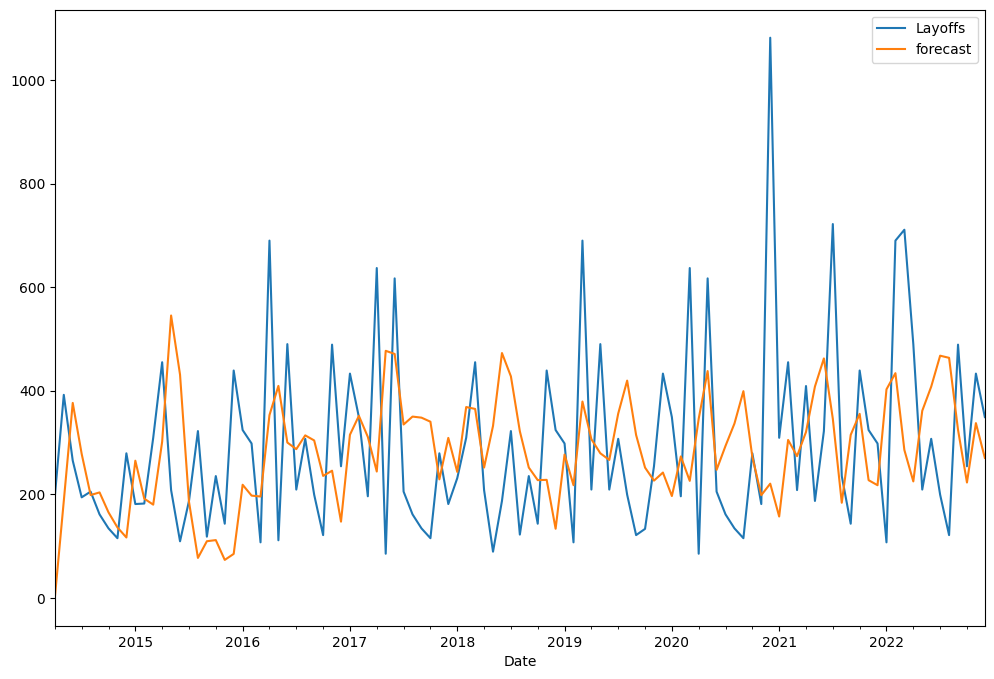

In [46]:
df['forecast']=results.predict()
df[['Layoffs','forecast']].plot(figsize=(12,8))

In [47]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(60)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_datest_df.tail()

,Layoffs,Sales First Difference,Seasonal First Difference,forecast
2027-07-01,NaN,NaN,NaN,NaN
2027-08-01,NaN,NaN,NaN,NaN
2027-09-01,NaN,NaN,NaN,NaN
2027-10-01,NaN,NaN,NaN,NaN
2027-11-01,NaN,NaN,NaN,NaN


,Layoffs,forecast
2014-04-01,196,NaN
2014-05-01,392,NaN
2014-06-01,265,NaN
2014-07-01,194,NaN
2014-08-01,205,NaN


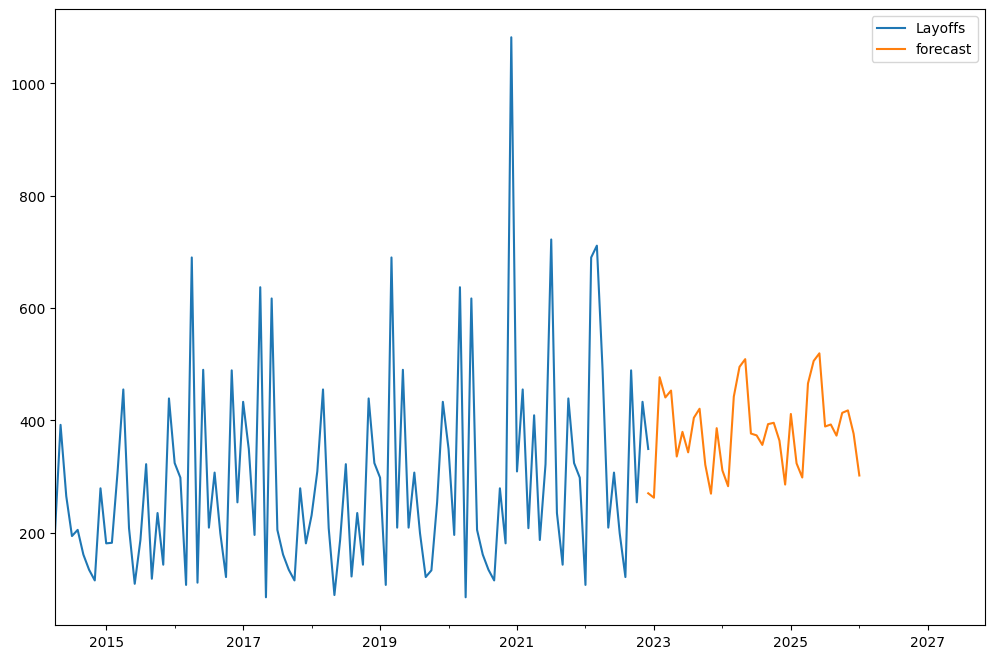

In [44]:
future_df=pd.concat([df,future_datest_df])
future_df['forecast'] = results.predict(start = 104, end = 141, dynamic= True)  
future_df[['Layoffs', 'forecast']].plot(figsize=(12, 8)) 
future_df[['Layoffs', 'forecast']].head()